In [ ]:
import os
import cv2  # For image processing
import numpy as np
import tensorflow as tf  # For deep learning
from sklearn.model_selection import train_test_split  # For data splitting
from keras.preprocessing import image  # For image loading in Keras format
from keras.applications import ResNet50  # For the ResNet50 pre-trained model
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image  # For general image handling
 

In [ ]:
from sklearn.utils import shuffle
# Path to the local dataset
dataset_path = r"C:\Users\satwi\Downloads\kvasir-dataset"  # Replace with your local dataset folder path
# List of class labels in your dataset
labels = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 
          'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
# Set image size to 224x224 for ResNet50
image_size = 224
# Initialize lists for storing images and labels
X_data = []
Y_data = []
# Load images and labels from the local system
for label in labels:
    folderPath = os.path.join(dataset_path, label)  # Assuming images are stored directly in class-labeled folders
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        if os.path.isfile(img_path):  # Check if it's a file
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))  # Resize to 224x224
            X_data.append(img)
            Y_data.append(label)
# Convert lists to numpy arrays
X_data = np.array(X_data)
Y_data = np.array(Y_data)
# Shuffle the data
X_data, Y_data = shuffle(X_data, Y_data, random_state=100)
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=100)
# Convert labels to categorical format (one-hot encoding)
y_train = tf.keras.utils.to_categorical([labels.index(label) for label in y_train], num_classes=len(labels))
y_test = tf.keras.utils.to_categorical([labels.index(label) for label in y_test], num_classes=len(labels))


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the image size
image_size = 224  # ResNet50 typically uses 224x224 images

# Load the pre-trained ResNet50 model (excluding the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten for better performance with ResNet
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(8, activation='softmax')(x)  # Update to 8 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train, epochs=75, validation_split=0.1, callbacks=[early_stopping]
)

# Save the trained model to a local path
model_save_path = r'C:\Users\satwi\Downloads\kvasir_model.h5'
model.save(model_save_path)


Epoch 1/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.6101 - loss: 1.0013 - val_accuracy: 0.8125 - val_loss: 0.4089
Epoch 2/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8455 - loss: 0.3922 - val_accuracy: 0.8219 - val_loss: 0.3867
Epoch 3/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8996 - loss: 0.2506 - val_accuracy: 0.8625 - val_loss: 0.3223
Epoch 4/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9273 - loss: 0.2081 - val_accuracy: 0.8531 - val_loss: 0.3519
Epoch 5/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9286 - loss: 0.1741 - val_accuracy: 0.8531 - val_loss: 0.3477
Epoch 6/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9445 - loss: 0.1432 - val_accuracy: 0.8656 - val_loss: 0.3036
Epoch 7/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.9608 - loss: 0.1110 - val_accuracy: 0.8500 - val_loss: 0.4816
Epoch 8/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9467 - loss: 0.1271 - val_accuracy: 0.8531 - v

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy, F1 score, precision, and recall
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step
Accuracy: 0.8675
F1 Score: 0.8667147290687849
Precision: 0.8680475044412617
Recall: 0.8675


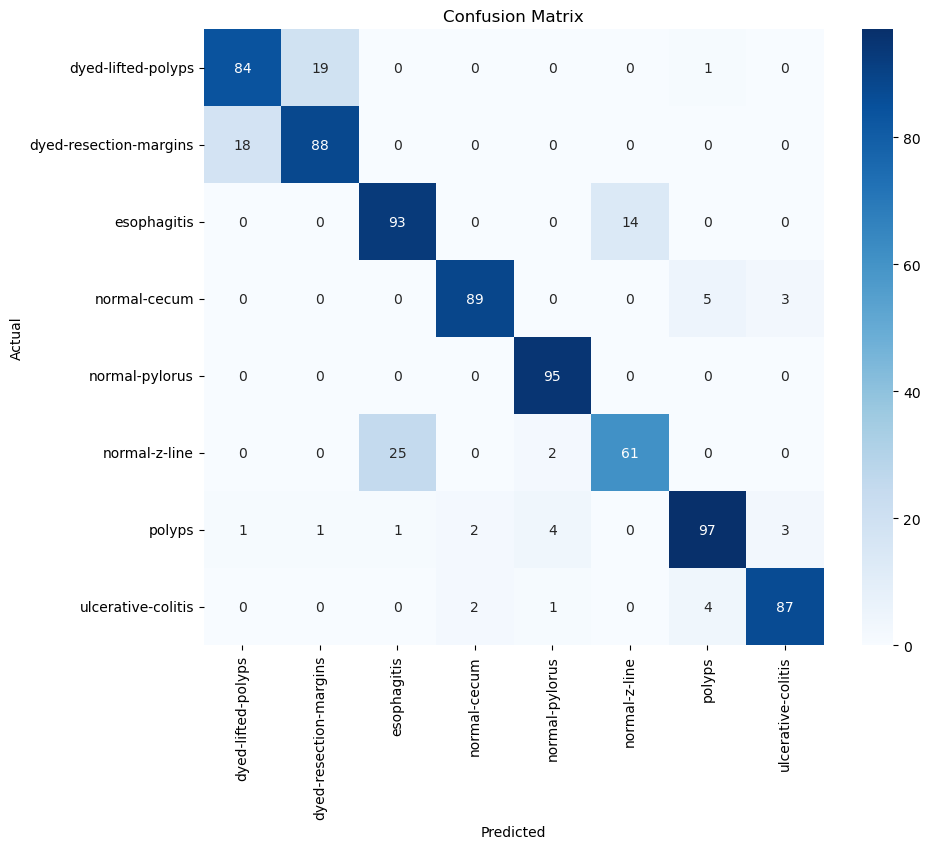

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class names for your gastrointestinal dataset
class_names = labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


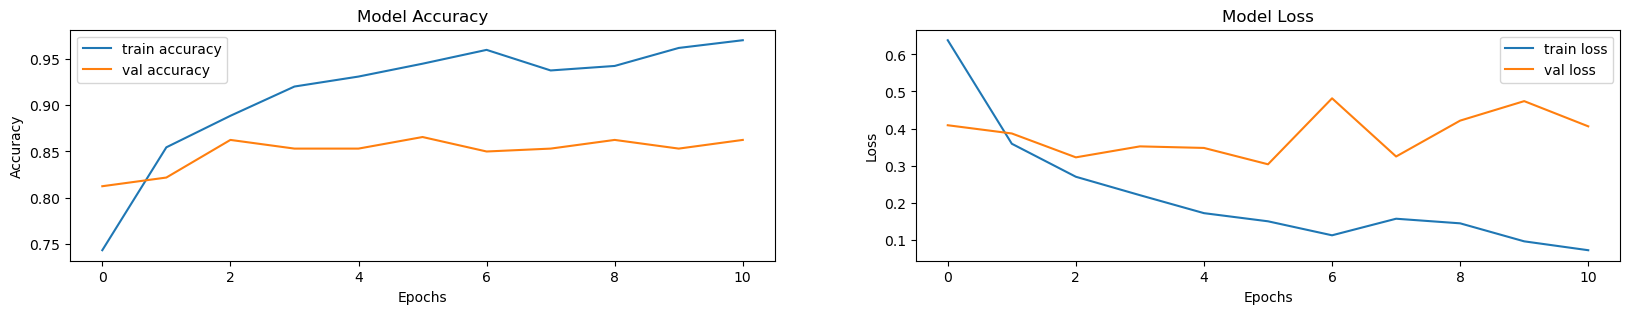

In [ ]:
# Assuming history.history contains training and validation metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots and plot the metrics
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

# Plot Accuracy
ax[0].plot(accuracy, label='train accuracy')
ax[0].plot(val_accuracy, label='val accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot Loss
ax[1].plot(loss, label='train loss')
ax[1].plot(val_loss, label='val loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model(r'C:\Users\satwi\Downloads\kvasir_model.h5')  # Update the path to your model

# Path to the single unseen image
unseen_image_path = r"C:\Users\satwi\Downloads\GASTRO\kvasir-dataset\test\dyed-resection-margins\abcc3878-3edf-4079-b92f-1fea4ecbb899.jpg" # Update with your test image path

# Load and preprocess the unseen image
img = load_img(unseen_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image (important for ResNet)

# Make predictions on the unseen image
y_pred_unseen = model.predict(img_array)
y_pred_class = np.argmax(y_pred_unseen, axis=1)[0]

# Print the predicted class for the image
print(f'Filename: {unseen_image_path} - Predicted Class: {labels[y_pred_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Filename: C:\Users\satwi\Downloads\GASTRO\kvasir-dataset\test\dyed-resection-margins\abcc3878-3edf-4079-b92f-1fea4ecbb899.jpg - Predicted Class: ulcerative-colitis


In [ ]:
#VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define image size and number of classes
image_size = 224
num_classes = 8  # Adjust based on the number of classes in your dataset

# Load the pre-trained VGG16 model (excluding the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers of the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling for better performance
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)  # Change num_classes to match your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,913,864 (56.89 MB)

 Trainable params: 199,176 (778.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model using the training data (x_train and y_train should be defined)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=75,
    validation_split=0.1,
    callbacks=[early_stopping]
)


Epoch 1/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.5628 - loss: 1.7526 - val_accuracy: 0.7656 - val_loss: 0.6139
Epoch 2/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.8523 - loss: 0.3881 - val_accuracy: 0.8125 - val_loss: 0.4465
Epoch 3/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step - accuracy: 0.8971 - loss: 0.2664 - val_accuracy: 0.8438 - val_loss: 0.4043
Epoch 4/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.9312 - loss: 0.1775 - val_accuracy: 0.8000 - val_loss: 0.5152
Epoch 5/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.9369 - loss: 0.1819 - val_accuracy: 0.8219 - val_loss: 0.5084
Epoch 6/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.9491 - loss: 0.1411 - val_accuracy: 0.8375 - val_loss: 0.5271
Epoch 7/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.9660 - loss: 0.1020 - val_accuracy: 0.8188 - val_loss: 0.4886
Epoch 8/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 340s 4s/step - accuracy: 0.9557 - loss: 0.1148 - val_accuracy: 0.8344 - v

In [ ]:
# Save the trained model
model.save(r'C:\Users\satwi\Downloads\vgg16_model.h5')


In [ ]:
# Evaluate the model using test data (x_test and y_test should be defined)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy, F1 score, precision, and recall
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step
Accuracy: 0.855
F1 Score: 0.8538753213994087
Precision: 0.8603065480234778
Recall: 0.855


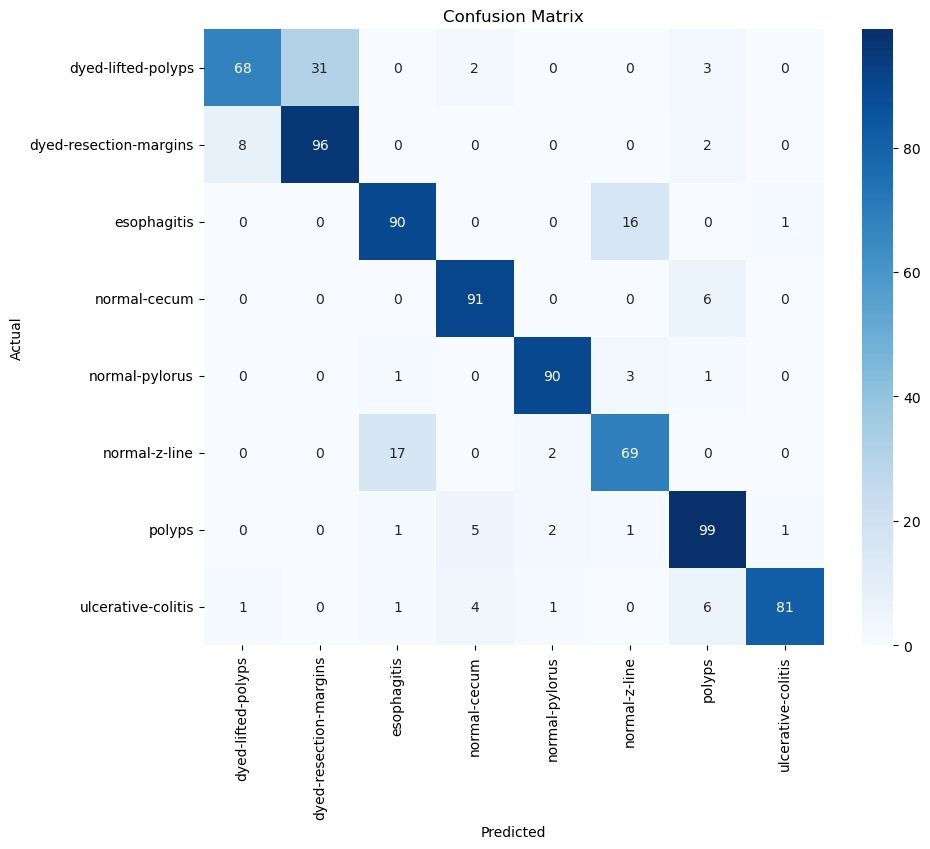

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


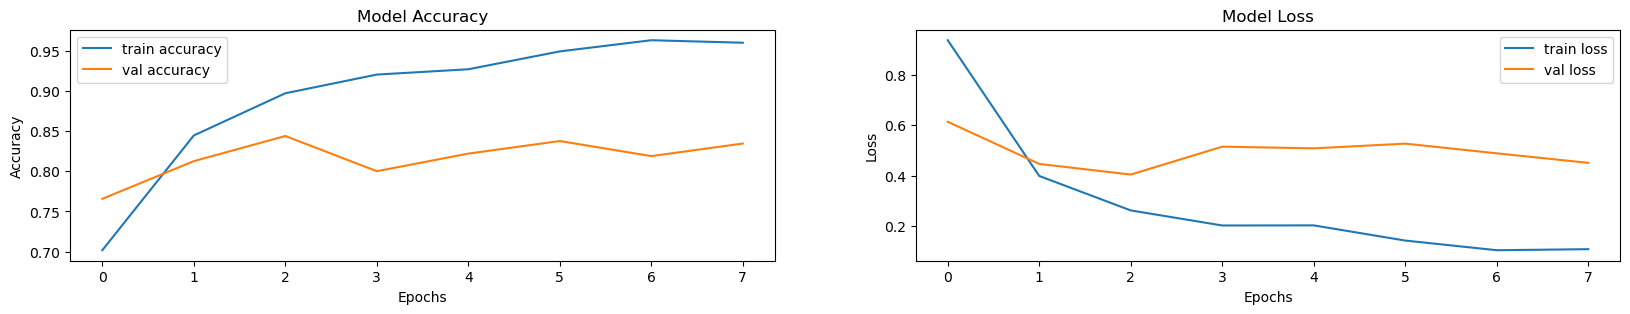

In [ ]:
# Assuming history contains training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(20, 3))

# Plot Accuracy
ax[0].plot(accuracy, label='train accuracy')
ax[0].plot(val_accuracy, label='val accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot Loss
ax[1].plot(loss, label='train loss')
ax[1].plot(val_loss, label='val loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Save the plot as an image
fig.savefig('vgg16_model_performance.png', bbox_inches='tight')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = tf.keras.models.load_model(r'C:\Users\satwi\Downloads\vgg16_model.h5')

# Load and preprocess a new image
img_path = r"C:\Users\satwi\Downloads\GASTRO\kvasir-dataset\test\dyed-resection-margins\abcc3878-3edf-4079-b92f-1fea4ecbb899.jpg"  # Update with your image path
img = load_img(img_path, target_size=(image_size, image_size))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict class of the image
y_pred = model.predict(img_array)
y_pred_class = np.argmax(y_pred, axis=1)[0]

# Print the predicted class
print(f'Predicted Class: {labels[y_pred_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted Class: esophagitis


In [ ]:
#Resnet101

In [ ]:
# ResNet101 Model Definition
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define image size and number of classes
image_size = 224
num_classes = 8  # Adjust based on the number of classes in your dataset

# Load the pre-trained ResNet101 model (excluding the top classification layers)
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers of the base ResNet101 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling for better performance
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)  # Change num_classes to match your dataset

# Create the final model
model_resnet101 = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_resnet101.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model_resnet101.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 43,250,568 (164.99 MB)

 Trainable params: 592,392 (2.26 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [ ]:
# Training, Evaluation, and Saving for ResNet101
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_resnet101 = model_resnet101.fit(
    x_train, y_train,
    epochs=75,
    validation_split=0.1,
    callbacks=[early_stopping]
)

# Save the ResNet101 model
model_resnet101.save(r'C:\Users\satwi\Downloads\model_resnet101.h5')

# Evaluate the model on the test data
y_pred_resnet101 = model_resnet101.predict(x_test)
y_pred_classes_resnet101 = np.argmax(y_pred_resnet101, axis=1)
y_true_resnet101 = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy_resnet101 = accuracy_score(y_true_resnet101, y_pred_classes_resnet101)
f1_resnet101 = f1_score(y_true_resnet101, y_pred_classes_resnet101, average='weighted')
precision_resnet101 = precision_score(y_true_resnet101, y_pred_classes_resnet101, average='weighted')
recall_resnet101 = recall_score(y_true_resnet101, y_pred_classes_resnet101, average='weighted')

# Print metrics
print(f'ResNet101 - Accuracy: {accuracy_resnet101}')
print(f'ResNet101 - F1 Score: {f1_resnet101}')
print(f'ResNet101 - Precision: {precision_resnet101}')
print(f'ResNet101 - Recall: {recall_resnet101}')

Epoch 1/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.6280 - loss: 0.9887 - val_accuracy: 0.8469 - val_loss: 0.3751
Epoch 2/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.8786 - loss: 0.3105 - val_accuracy: 0.8344 - val_loss: 0.3620
Epoch 3/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.8998 - loss: 0.2516 - val_accuracy: 0.8469 - val_loss: 0.3236
Epoch 4/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9201 - loss: 0.2059 - val_accuracy: 0.8562 - val_loss: 0.3831
Epoch 5/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9136 - loss: 0.1897 - val_accuracy: 0.8719 - val_loss: 0.3172
Epoch 6/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9435 - loss: 0.1580 - val_accuracy: 0.8844 - val_loss: 0.3328
Epoch 7/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9567 - loss: 0.1109 - val_accuracy: 0.8438 - val_loss: 0.4631
Epoch 8/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9325 - loss: 0.1831 - val_accuracy: 0.8844 - v

25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step
ResNet101 - Accuracy: 0.86625
ResNet101 - F1 Score: 0.8642876811770926
ResNet101 - Precision: 0.8774386245197863
ResNet101 - Recall: 0.86625


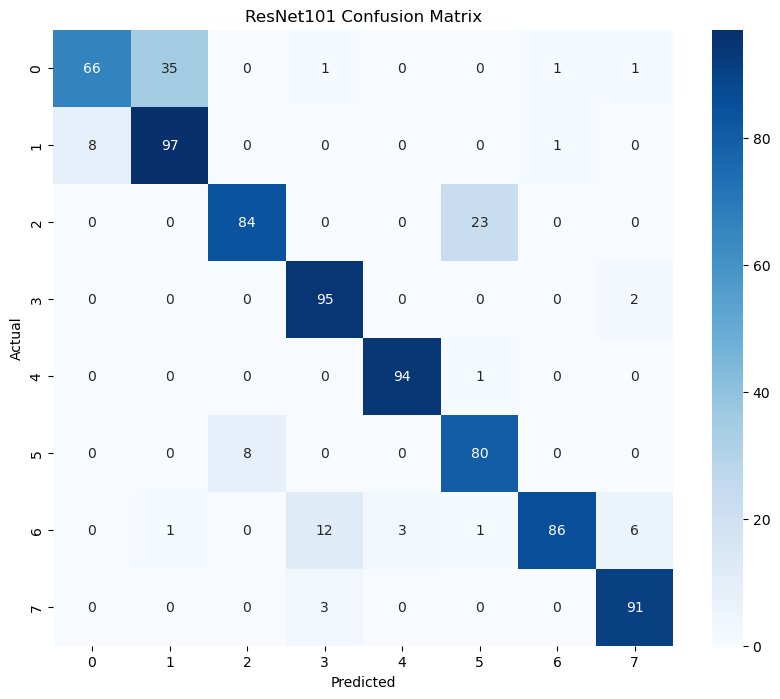

In [ ]:
# Confusion Matrix
cm_resnet101 = confusion_matrix(y_true_resnet101, y_pred_classes_resnet101)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_resnet101, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ResNet101 Confusion Matrix')
plt.show()

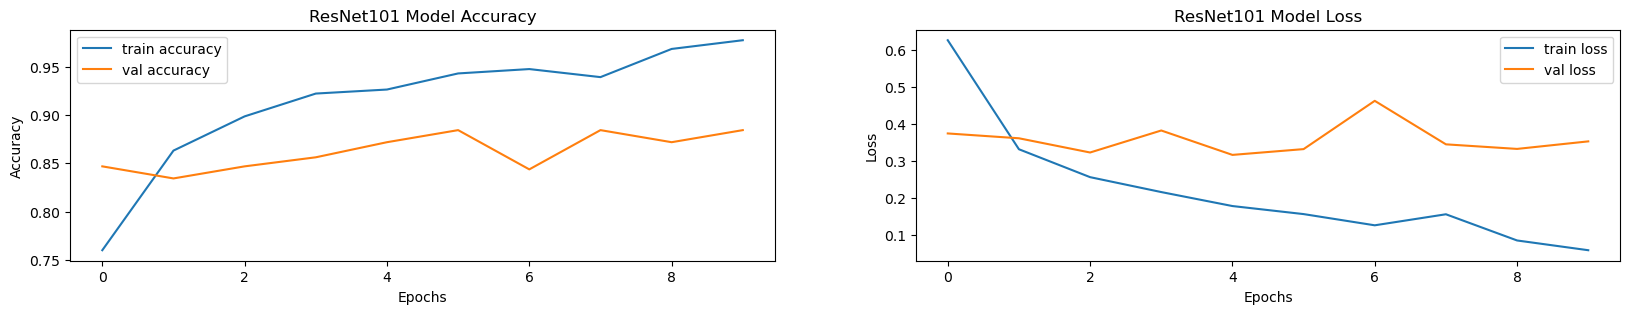

In [ ]:
# Plot training history
accuracy_resnet101 = history_resnet101.history['accuracy']
val_accuracy_resnet101 = history_resnet101.history['val_accuracy']
loss_resnet101 = history_resnet101.history['loss']
val_loss_resnet101 = history_resnet101.history['val_loss']

fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax[0].plot(accuracy_resnet101, label='train accuracy')
ax[0].plot(val_accuracy_resnet101, label='val accuracy')
ax[0].set_title('ResNet101 Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(loss_resnet101, label='train loss')
ax[1].plot(val_loss_resnet101, label='val loss')
ax[1].set_title('ResNet101 Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Save the plot as an image
fig.savefig('resnet101_performance.png', bbox_inches='tight')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load your pre-trained models
resnet50_model = load_model(r'C:\Users\satwi\Downloads\kvasir_model.h5')
vgg16_model = load_model(r'C:\Users\satwi\Downloads\vgg16_model.h5')
resnet101_model = load_model(r'C:\Users\satwi\Downloads\model_resnet101.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet101_preprocess_input

# Preprocessing function
def preprocess_data(img_path, model_name="ResNet50"):
    img = image.load_img(img_path, target_size=(224, 224))  # Resizing to 224x224 for all models
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    if model_name == "ResNet50":
        return resnet50_preprocess_input(img_array)
    elif model_name == "VGG16":
        return vgg16_preprocess_input(img_array)
    elif model_name == "ResNet101":
        return resnet101_preprocess_input(img_array)


In [ ]:
import numpy as np

# Assume you have a list of test image paths
test_image_paths = [r"C:\Users\satwi\Downloads\kvasir-dataset\polyps\cf6d6e54-eb09-4457-a7e7-c5aaf1633c21.jpg",r"C:\Users\satwi\Downloads\kvasir-dataset\polyps\d5ebe505-da7f-49f2-af03-693878673b23.jpg",r"C:\Users\satwi\Downloads\kvasir-dataset\polyps\d9a0874a-990a-4bc6-9e42-62e2b6e65381.jpg"]

# Preprocess each test image and evaluate the models
for img_path in test_image_paths:
    preprocessed_image_resnet50 = preprocess_data(img_path, "ResNet50")
    preprocessed_image_vgg16 = preprocess_data(img_path, "VGG16")
    preprocessed_image_resnet101 = preprocess_data(img_path, "ResNet101")

    # Evaluate each model
    resnet50_pred = resnet50_model.predict(preprocessed_image_resnet50)
    vgg16_pred = vgg16_model.predict(preprocessed_image_vgg16)
    resnet101_pred = resnet101_model.predict(preprocessed_image_resnet101)

    # Assuming you know your class labels, you can find the predictions
    resnet50_class = np.argmax(resnet50_pred, axis=1)
    vgg16_class = np.argmax(vgg16_pred, axis=1)
    resnet101_class = np.argmax(resnet101_pred, axis=1)

    print(f"ResNet50 predicted class: {resnet50_class}")
    print(f"VGG16 predicted class: {vgg16_class}")
    print(f"ResNet101 predicted class: {resnet101_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
ResNet50 predicted class: [4]
VGG16 predicted class: [6]
ResNet101 predicted class: [6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
ResNet50 predicted class: [7]
VGG16 predicted class: [6]
ResNet101 predicted class: [6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
ResNet50 predicted class: [6]
VGG16 predicted class: [6]
ResNet101 predicted class: [6]


In [ ]:
# Evaluate each model on the test set
resnet50_test_loss, resnet50_test_acc = resnet50_model.evaluate(x_test, y_test)
vgg16_test_loss, vgg16_test_acc = vgg16_model.evaluate(x_test, y_test)
resnet101_test_loss, resnet101_test_acc = resnet101_model.evaluate(x_test, y_test)

print(f"ResNet50 Test Accuracy: {resnet50_test_acc}")
print(f"VGG16 Test Accuracy: {vgg16_test_acc}")
print(f"ResNet101 Test Accuracy: {resnet101_test_acc}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8625 - loss: 0.3720
25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8528 - loss: 0.4139
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8758 - loss: 0.3673
ResNet50 Test Accuracy: 0.8675000071525574
VGG16 Test Accuracy: 0.8550000190734863
ResNet101 Test Accuracy: 0.8662499785423279


In [ ]:
# Save the best model
best_model = None
if resnet50_test_acc > vgg16_test_acc and resnet50_test_acc > resnet101_test_acc:
    best_model = resnet50_model
    print('Best Model Is : ResNet50')
elif vgg16_test_acc > resnet50_test_acc and vgg16_test_acc > resnet101_test_acc:
    best_model = vgg16_model
    print('Best Model Is : VGG16')
else:
    best_model = resnet101_model
    print('Best Model Is : ResNet101')
best_model.save(r'C:\Users\satwi\Downloads\best_model.h5')
print("Best model saved as 'best_model.h5'")


Best Model Is : ResNet50
Best model saved as 'best_model.h5'


In [ ]:
# List all layer names in the model
for layer in model.layers:
    print(layer.name)


input_layer_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


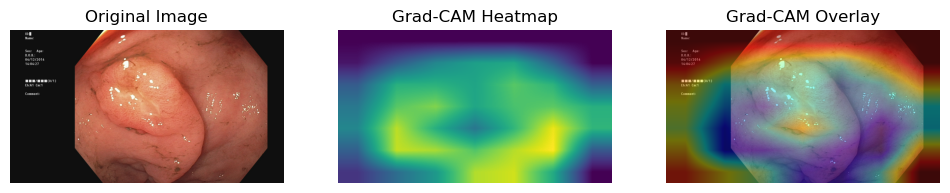

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Grad-CAM Function
def generate_gradcam(model, img_array, class_index, layer_name="conv5_block3_out"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)  # Normalize heatmap
    return heatmap

# Visualize Grad-CAM on the original image
def visualize_gradcam(image_path, model, class_index, layer_name="conv5_block3_out"):
    # Load and preprocess image
    img_array = preprocess_image(image_path)
    
    # Generate Grad-CAM heatmap
    heatmap = generate_gradcam(model, img_array, class_index, layer_name)
    
    # Load the original image for overlaying the heatmap
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Resize heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_resized = np.uint8(255 * heatmap_resized)  # Scale heatmap to 0-255
    
    # Apply a colormap (e.g., jet) for better visualization
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
    overlay_image = cv2.addWeighted(original_image, 0.6, heatmap_colored, 0.4, 0)
    
    # Plot results
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title("Original Image")

    # Grad-CAM heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized, cmap='viridis')
    plt.axis('off')
    plt.title("Grad-CAM Heatmap")

    # Overlay image
    plt.subplot(1, 3, 3)
    plt.imshow(overlay_image)
    plt.axis('off')
    plt.title("Grad-CAM Overlay")

    plt.show()

# Example usage:
image_path = r"C:\Users\satwi\Downloads\kvasir-dataset\polyps\cf6d6e54-eb09-4457-a7e7-c5aaf1633c21.jpg"  # Replace with your image path
preds = model.predict(preprocess_image(image_path))  # Predict class
class_index = np.argmax(preds[0])  # Get predicted class index

# Visualize Grad-CAM for the predicted class
visualize_gradcam(image_path, model, class_index, layer_name="conv5_block3_out")
